In [1]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Set visualization styles
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Extract features and target
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# Combine features and target into a single DataFrame for easier analysis
df = pd.concat([X, y], axis=1)

# Display first few rows
print(df.head())


   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        15         1    0  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [4]:
# Metadata
print("Metadata:")
print(cdc_diabetes_health_indicators.metadata)

# Variable Information
print("\nVariable Information:")
print(cdc_diabetes_health_indicators.variables)
#This will provide you with an understanding of the dataset's structure, including feature names, data types, and descriptions.

Metadata:
{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': No

In [5]:
# Check the shape of the dataset
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Data types and non-null counts
print("\nData Types and Non-Null Counts:")
print(df.info())
# Part of dataset description and evidence of No Missing Values


Dataset contains 253680 rows and 22 columns.

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentH

In [6]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"\nCategorical Columns: {categorical_cols.tolist()}")

#IF there were any categorical columns they would be replaced with one-hot encoding however the analysis shows there are no categorical columns




Categorical Columns: []


Number of numerical features: 21


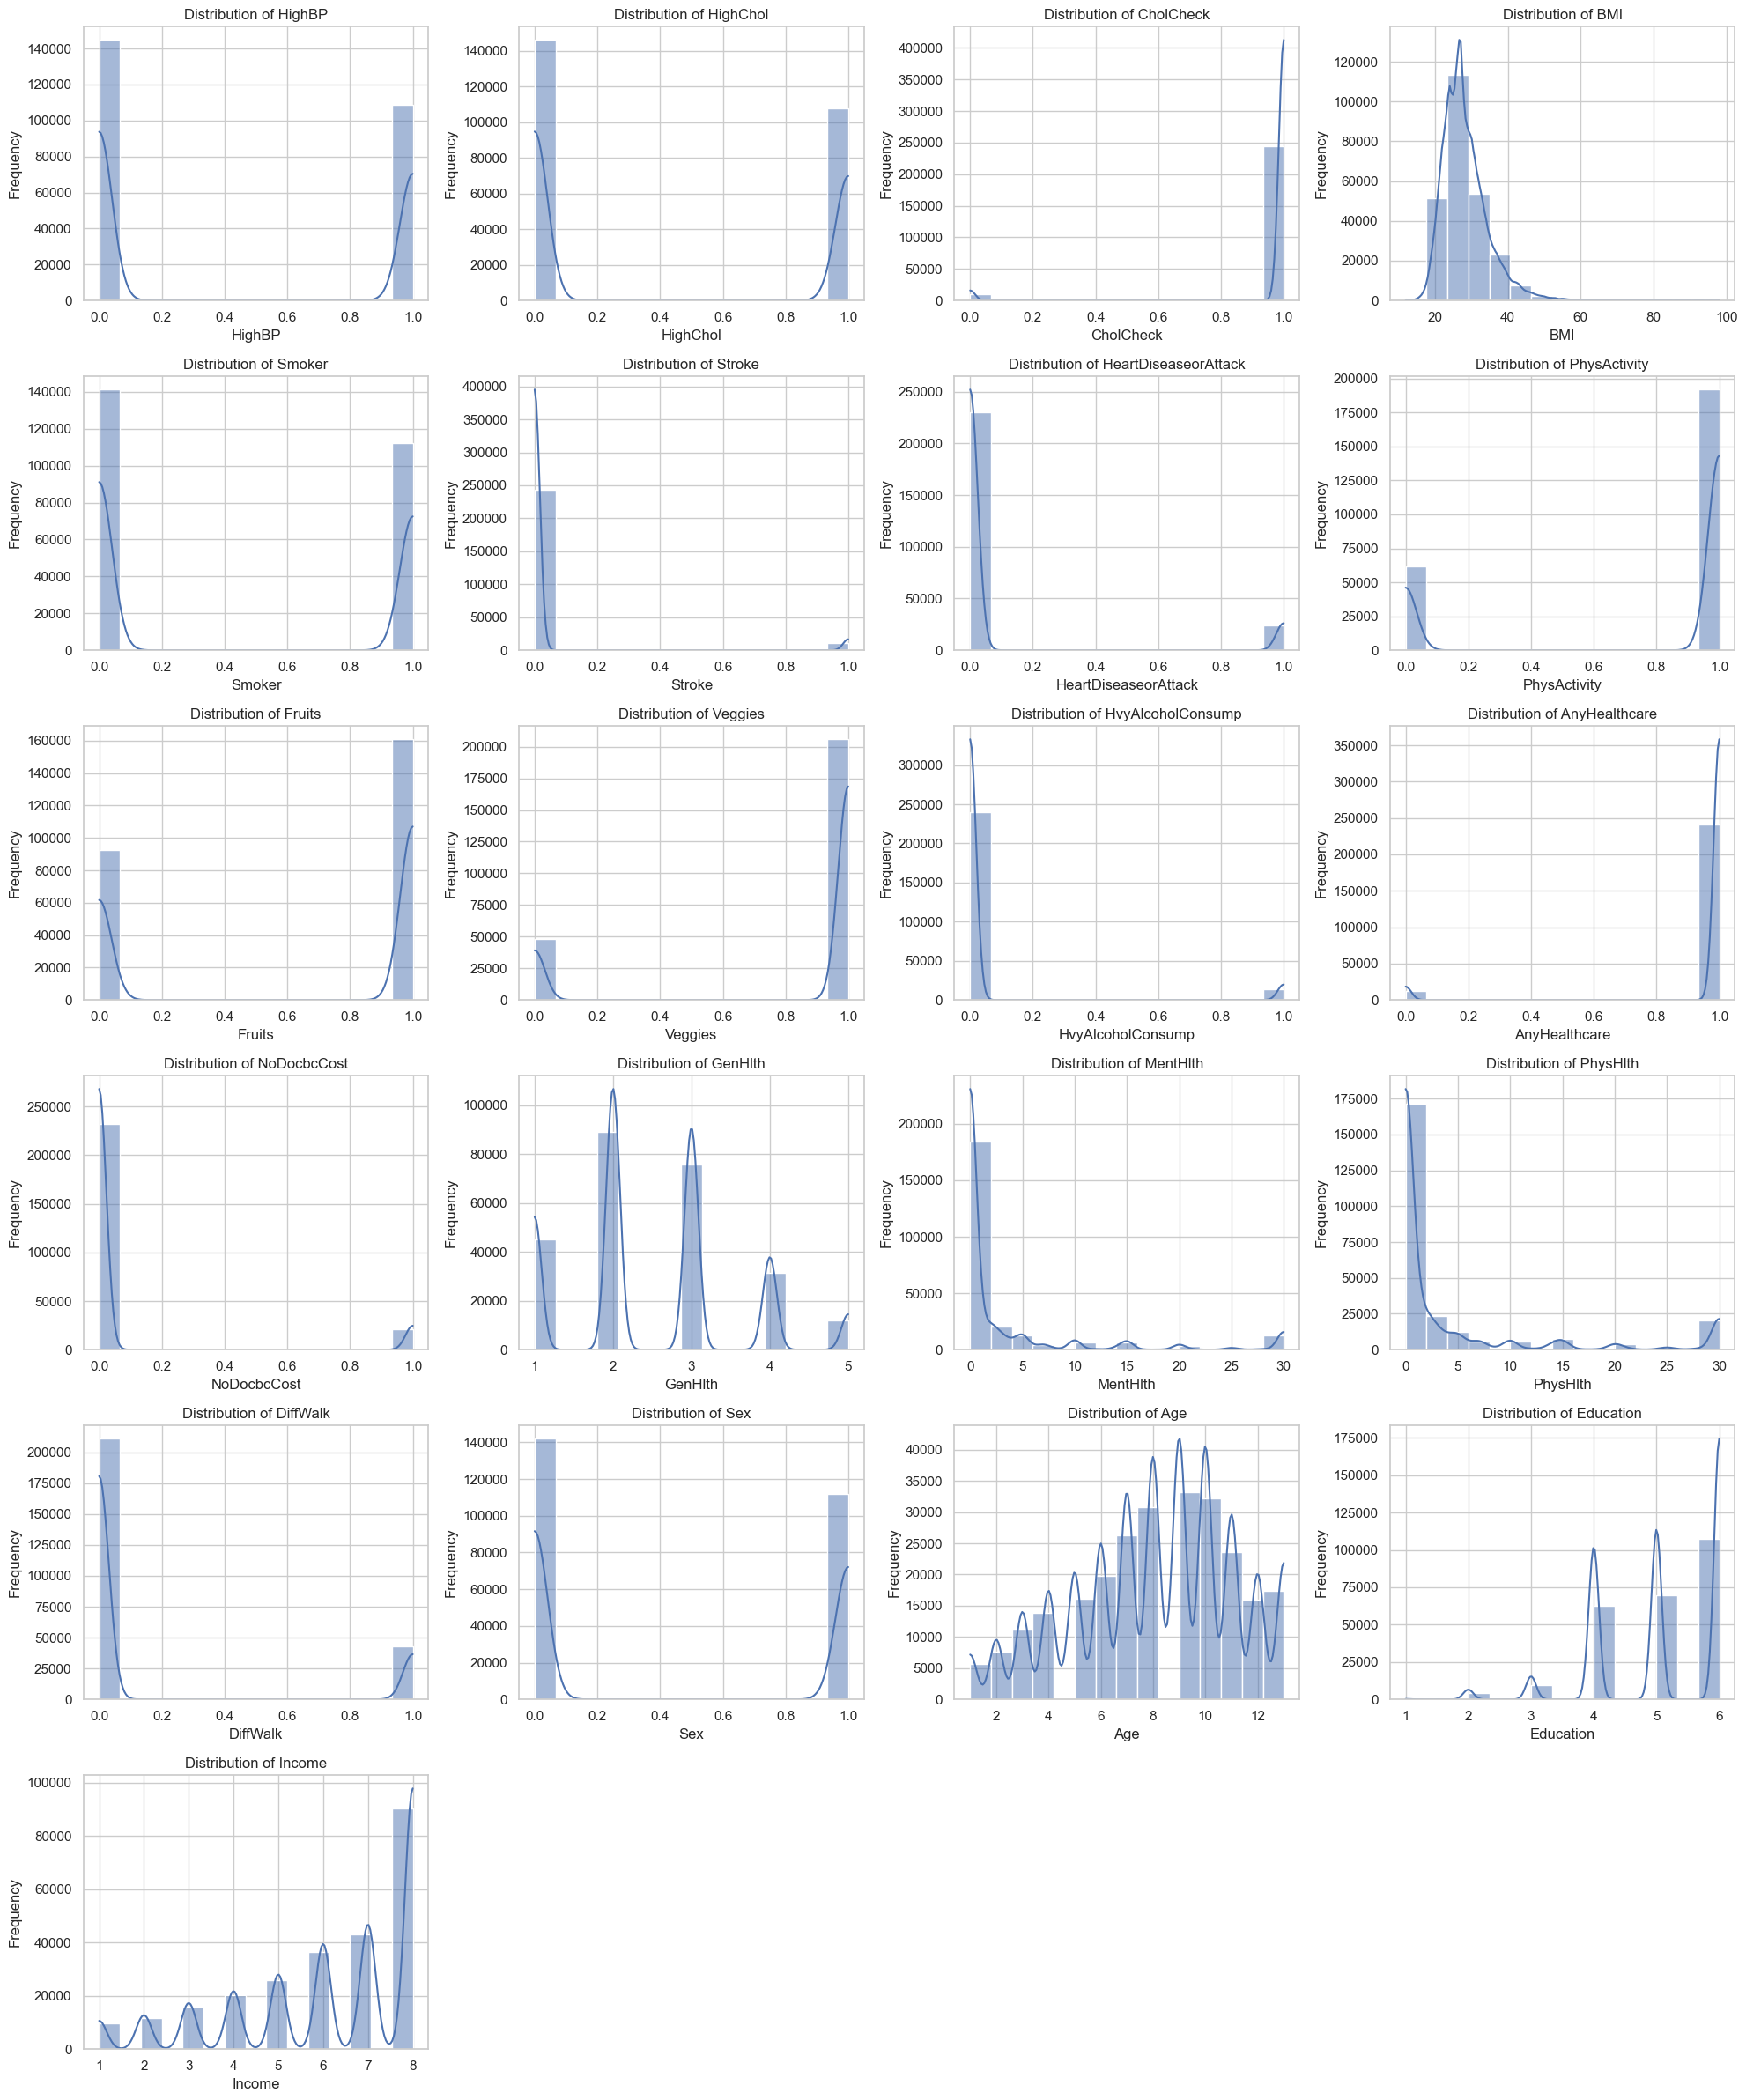

In [7]:
### **5. Univariate Analysis**
import math

# List of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target column if it's numerical
if 'Diabetes_binary' in numerical_cols:
    numerical_cols.remove('Diabetes_binary')

num_features = len(numerical_cols)

print(f"Number of numerical features: {num_features}")

# Determine layout
cols = 4  # Number of columns in the subplot grid
rows = math.ceil(num_features / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

# Plot histograms
for idx, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=15, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Remove any unused subplots
for idx in range(num_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [8]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# Select features with higher correlation to the target
high_corr_features = corr_matrix['Diabetes_binary'].abs().sort_values(ascending=False).head(10).index.tolist()
print(high_corr_features)



NameError: name 'df_encoded' is not defined

In [ ]:
# Define function to detect outliers using the IQR method
def detect_outliers_iqr(df):
    outliers_dict = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = outliers.shape[0]
    return outliers_dict

# Apply the function to detect outliers using IQR
outliers_iqr = detect_outliers_iqr(df)
print(f"Number of outliers in each feature (IQR method): {outliers_iqr}")

# Optionally, remove outliers using the IQR method
df_no_outliers_iqr = df.copy()
for col in numerical_cols:
    Q1 = df_no_outliers_iqr[col].quantile(0.25)
    Q3 = df_no_outliers_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers_iqr = df_no_outliers_iqr[(df_no_outliers_iqr[col] >= lower_bound) & (df_no_outliers_iqr[col] <= upper_bound)]

print(f"Shape of dataset after removing outliers (IQR method): {df_no_outliers_iqr.shape}")


Number of outliers in each feature (IQR method): {'HighBP': 0, 'HighChol': 0, 'CholCheck': 9470, 'BMI': 9847, 'Smoker': 0, 'Stroke': 10292, 'HeartDiseaseorAttack': 23893, 'PhysActivity': 61760, 'Fruits': 0, 'Veggies': 47839, 'HvyAlcoholConsump': 14256, 'AnyHealthcare': 12417, 'NoDocbcCost': 21354, 'GenHlth': 12081, 'MentHlth': 36208, 'PhysHlth': 40949, 'DiffWalk': 42675, 'Sex': 0, 'Age': 0, 'Education': 0, 'Income': 0}
Shape of dataset after removing outliers (IQR method): (67088, 22)


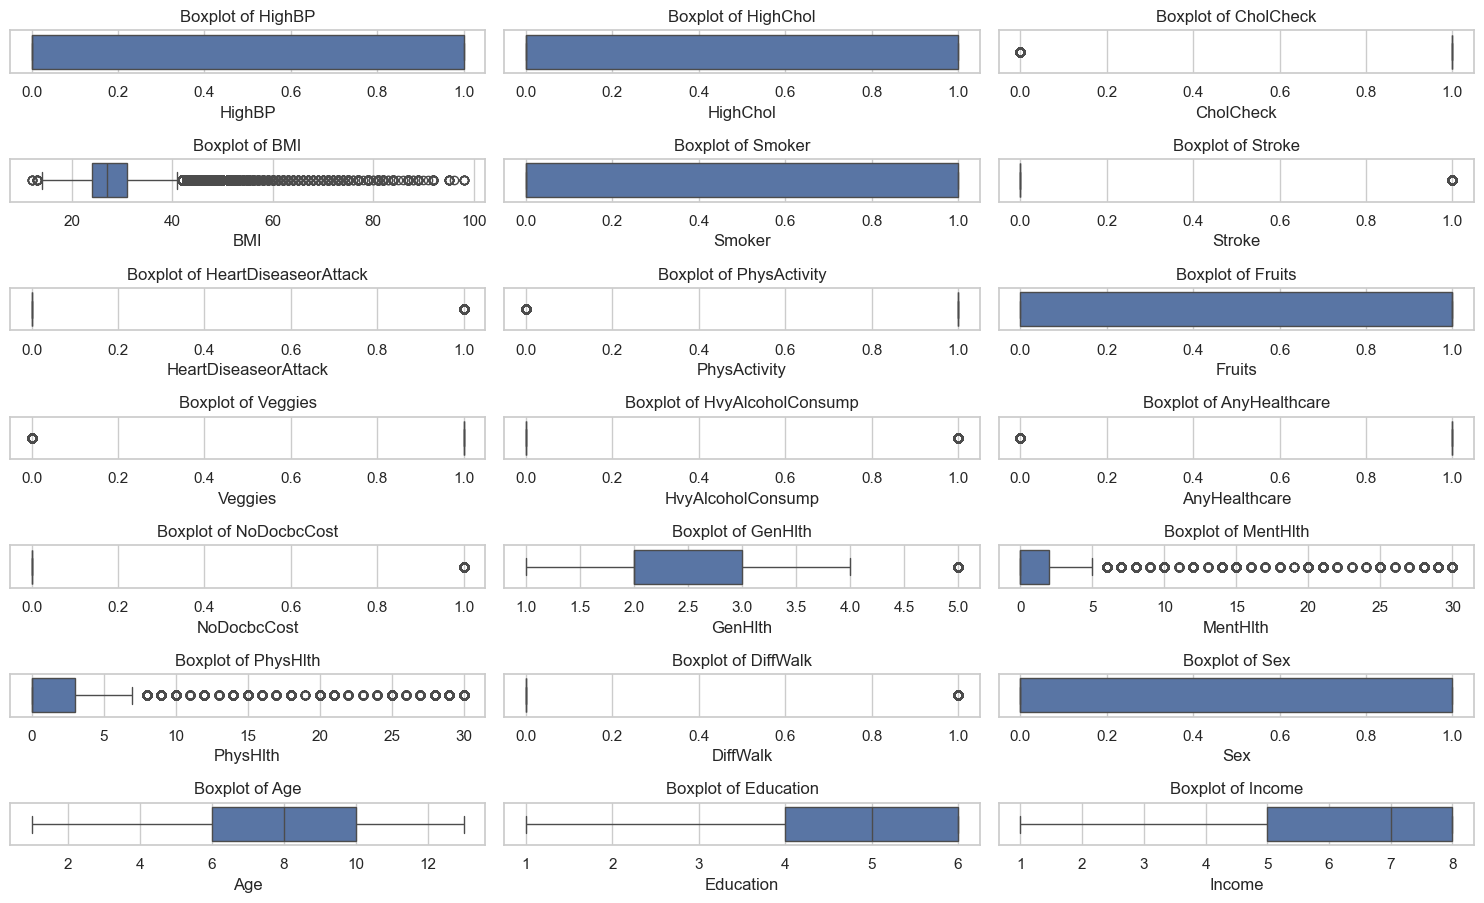

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns (excluding target)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# If 'Diabetes_binary' is a numerical column, we can remove it from analysis
if 'Diabetes_binary' in numerical_cols:
    numerical_cols.remove('Diabetes_binary')

# Plot boxplots for each numerical feature to detect outliers visually
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()



Skewness of numerical features:
HighBP                  0.286903
HighChol                0.307073
CholCheck              -4.881243
BMI                     2.121991
Smoker                  0.228809
Stroke                  4.657312
HeartDiseaseorAttack    2.778725
PhysActivity           -1.195539
Fruits                 -0.557496
Veggies                -1.592229
HvyAlcoholConsump       3.854109
AnyHealthcare          -4.181091
NoDocbcCost             2.995272
GenHlth                 0.422864
MentHlth                2.721132
PhysHlth                2.207382
DiffWalk                1.773897
Sex                     0.240348
Age                    -0.359901
Education              -0.777251
Income                 -0.891340
dtype: float64


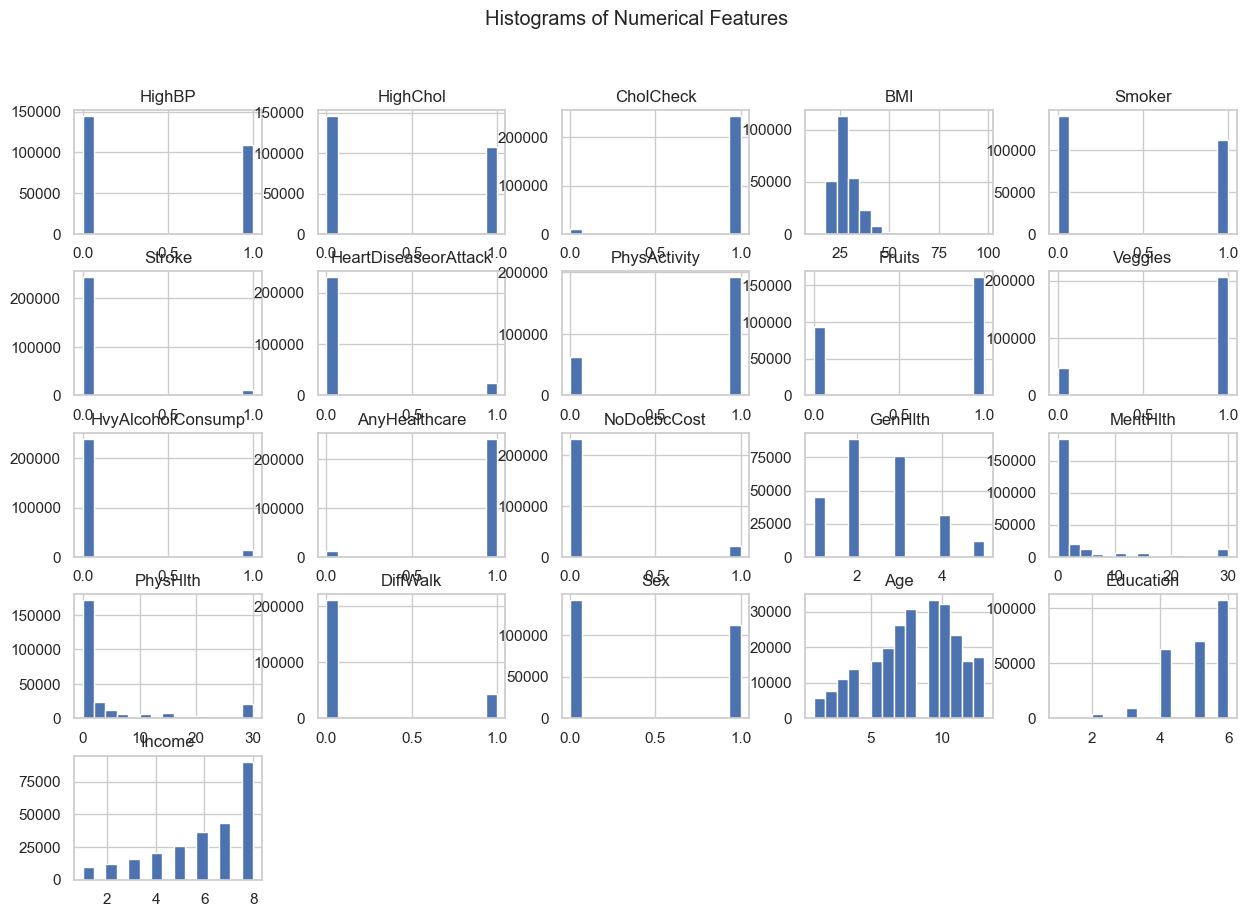

In [ ]:
from scipy.stats import skew

# Calculate skewness for numerical features
skew_values = df[numerical_cols].apply(lambda x: skew(x.dropna()))
print(f"Skewness of numerical features:\n{skew_values}")

# Interpret skewness values:
# Skewness > 1 or < -1: Highly skewed
# 0.5 < Skewness < 1 or -0.5 > Skewness > -1: Moderately skewed
# -0.5 < Skewness < 0.5: Approximately symmetric
# Plot histograms for numerical features to check skewness visually
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

